In [104]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d

In [105]:
data = np.loadtxt("./../output/Kessence_fields.dat")
print(np.shape(data))
print(data[:,1].max(),data[:,1].min())

(1069541, 8)
(0.093909039999999999, 2.957507e-10)


# Mask of "a" in an interval

In [106]:
astar=1./(101.) # z=0, desired redshift
ainterval=0.01
mask = np.logical_and(data[:,1]>astar-ainterval, data[:,1]<astar+ainterval)
print (mask)
dataprime = data[mask]
print(dataprime)
print(np.shape(dataprime))

[ True  True  True ...,  True  True  True]
[[  7.29515400e-001   2.95750700e-010  -6.86061600e-297 ...,
    9.79594700e-001   2.78134200e-309   9.79594700e-001]
 [  7.29515400e-001   2.95750700e-010  -1.01626200e+008 ...,
    1.01626200e+009   4.11999700e-005   3.00560000e-001]
 [  7.29515400e-001   2.95750700e-010  -1.01626200e+008 ...,
    1.01626200e+009   4.11999700e-005   3.00560000e-001]
 ..., 
 [  7.12503200e-006   1.26836600e-002  -2.89705600e+000 ...,
    2.91788300e+001   3.25009200e+002   2.08268100e-001]
 [  7.12503200e-006   1.19231800e-002  -3.37547000e+000 ...,
    3.39623300e+001   3.44890600e+002   2.07627600e-001]
 [  7.12503200e-006   1.25266100e-002  -3.03110400e+000 ...,
    3.05190200e+001   3.33704100e+002   2.07979800e-001]]
(835974, 8)


# The condition array checks if two succesive rows (k) are equal

In [107]:
condition=np.zeros(np.shape(dataprime)[0])
for i in range(0,np.shape(dataprime)[0]-1):
#     consition[ii] =np.array_equal(dataprime[i,0],dataprime[i+1,0])
    condition[i]=int(np.array_equal(dataprime[i,0],dataprime[i+1,0]))
print(condition[:200])

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


# Here we want to have list of equal k to loop over in next step

In [108]:
klistinitial=np.zeros(np.shape(dataprime)[0]);
j=0;
for i in range (0,np.shape(dataprime)[0]-1):
    if (condition[i]==0):
        klistinitial[j]=dataprime[i-1,0]
        j+=1;

klist = klistinitial[klistinitial!=0]

# At this point we make different matrices, each has the same "k" but different "a" and field valus

In [109]:
dataprime_separated = np.zeros((np.shape(klist)[0],np.shape(dataprime)[0],8))

for l,p in enumerate(klist):
    w = np.shape(dataprime[dataprime[:,0]==p])[0]
    dataprime_separated[l,:w,:] = dataprime[dataprime[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated)

(335, 835974, 8)

# Now we construct the final file which is in fixed redshift and loop over different "k", we interpolate the value of the fields in the desire "a" and make transfer function file

In [111]:
Final_file=np.zeros((np.shape(klist)[0],2)); # the final file for the fiels are initialized, klist is the list ok k without repitition
Transfer_kess=np.zeros((np.shape(klist)[0],2)); # the final file for the fiels are initialized, klist is the list ok k without repitition

for i in range(np.shape(klist)[0]):
#     print(i)
    Vec_x = dataprime_separated[i,dataprime_separated[i,:,0]!=0,:]
#     interp_pi=interp1d(Vec_x[:,1],Vec_x[:,2], kind='cubic')
#     interp_pi_prime=interp1d(Vec_x[:,1], Vec_x[:,3], kind='cubic')
#     interp_pi_prime_prime=interp1d(Vec_x[:,1], Vec_x[:,4], kind='cubic')
#     interp_deltarho=interp1d(Vec_x[:,1],Vec_x[:,2])
    interp_pi=interp1d(Vec_x[:,1], Vec_x[:,3])
#     interp_pi_prime=interp1d(Vec_x[:,1], Vec_x[:,4])
#     psi_sync=interp1d(Vec_x[:,1], Vec_x[:,5])
#     alpha=interp1d(Vec_x[:,1], Vec_x[:,6])
#     alpha_prime=interp1d(Vec_x[:,1], Vec_x[:,7])

#     interp_pi_prime_prime=interp1d(Vec_x[:,1], Vec_x[:,4])
    Final_file[i,0]=klist[i]
#     Final_file[i,1]=astar
#     Final_file[i,2]=interp_deltarho(astar)
    Final_file[i,1]=interp_pi(astar)
#     Final_file[i,4]=interp_pi_prime(astar)
#     Final_file[i,5]=psi_sync(astar)
#     Final_file[i,6]=alpha(astar)
#     Final_file[i,7]=alpha_prime(astar)

#     Final_file[i,4]=interp_pi_prime_prime(astar)
Final_file = Final_file[Final_file[:,0].argsort()]
# Transfer_kess[:,0]=Final_file[:,0]; # wavenumber
# Transfer_kess[:,1]=Final_file[:,1]; # redshift
# Transfer_kess[:,2]=Final_file[:,2] # T= \pi
# Transfer_kess[:,3]=Final_file[:,3]; # T_pi_dot= \pi_v
# Transfer_kess[:,4]=Final_file[:,4]*Final_file[:,4]; # T_pi_dot_dot= \pi_v^2

np.savetxt("Kessz100_gevol_ini.txt",Final_file)

# np.savetxt("New_Transferfunction.txt",Transfer_kess)

# \alpha gauge transformation behaviour for different k in time (scale factor)

In [24]:
alpha_hi=np.loadtxt("/Users/farbod/Packages/hi_class/output/k_a_alpha.dat")
Kessence_field=np.loadtxt("/Users/farbod/Packages/hi_class/output/Kessence_fields.dat")

In [213]:
alpha_hi_k1=alpha_hi[np.logical_and(alpha_hi[:,0] < 0.7295154+1.E-6,alpha_hi[:,0] > 0.7295154-1.E-6),:];
alpha_hi_k2=alpha_hi[np.logical_and(alpha_hi[:,0] < 0.1687104+1.E-6,alpha_hi[:,0] > 0.1687104-1.E-6),:];
alpha_hi_k3=alpha_hi[np.logical_and(alpha_hi[:,0] < 0.05997475+1.E-6,alpha_hi[:,0] > 0.05997475-1.E-6),:];
alpha_hi_z1=alpha_hi[np.logical_and(alpha_hi[:,1] < 0.00990099+1.E-4,alpha_hi[:,1] > 0.00990099-1.E-4),:];
alpha_hi_z2=alpha_hi[np.logical_and(alpha_hi[:,1] < 1./(11.)+1.E-4,alpha_hi[:,1] > 1./(11.)-1.E-4),:];
# alpha_hi_z3=alpha_hi[np.logical_and(alpha_hi[:,1] < 1./(10.)+1.E-3,alpha_hi[:,1] > 1./(10.)-1.E-3),:];

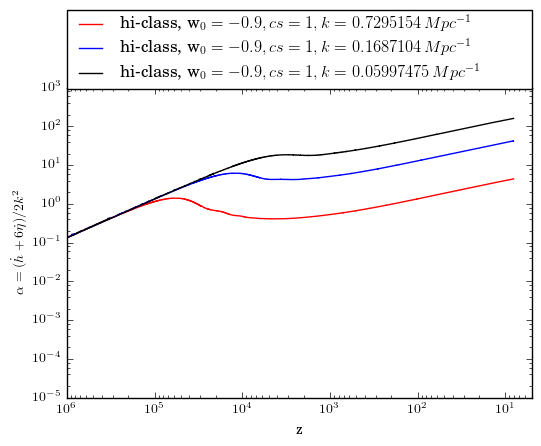

In [218]:
# file_hiclass_2 = file_hiclass[file_hiclass[:,0].argsort()] # sorted in redshift
# file_hiclass=file_hiclass_2[np.logical_and(file_hiclass_2[:,0] < 0.09965908,file_hiclass_2[:,0] > 0.09965908-0.05),:];
# np.shape(alpha_hi_N)
plt.plot(-1.+1./(alpha_hi_k1[:,1]),alpha_hi_k1[:,2],color="red",label=r"hi-class, w_0=-0.9,cs=1, k=0.7295154 \, Mpc^{-1}")
plt.plot(-1.+1./(alpha_hi_k2[:,1]),alpha_hi_k2[:,2],color="blue",label=r"hi-class, w_0=-0.9,cs=1, k=0.1687104 \, Mpc^{-1}")
plt.plot(-1.+1./(alpha_hi_k3[:,1]),alpha_hi_k3[:,2],color="black",label=r"hi-class, w_0=-0.9,cs=1, k=0.05997475 \, Mpc^{-1}")

plt.legend(bbox_to_anchor=(0., 1.15, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.xscale('log')
plt.yscale('log')

plt.xlim(1e6,5)
# plt.ylim(0,200)
plt.xlabel(r"z")
plt.ylabel(r"$\alpha=(\dot{h}+6 \dot{\eta})/{2k^2}$ ")
plt.savefig('alpha_k.jpg',bbox_inches='tight')
plt.show()

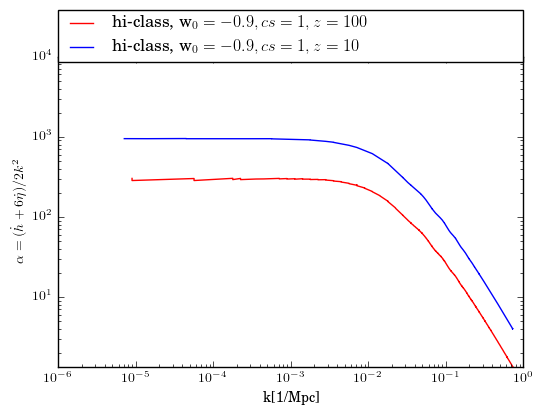

In [228]:
# file_hiclass_2 = file_hiclass[file_hiclass[:,0].argsort()] # sorted in redshift
# file_hiclass=file_hiclass_2[np.logical_and(file_hiclass_2[:,0] < 0.09965908,file_hiclass_2[:,0] > 0.09965908-0.05),:];
# np.shape(alpha_hi_N)
plt.plot((alpha_hi_z1[:,0]),alpha_hi_z1[:,2],color="red",label="hi-class, w_0=-0.9,cs=1, z=100 ")
plt.plot((alpha_hi_z2[:,0]),alpha_hi_z2[:,2],color="blue",label="hi-class, w_0=-0.9,cs=1, z=10 ")
# plt.plot((alpha_hi_z3[:,0]),alpha_hi_z3[:,2],color="black",label="hi-class, w_0=-0.9,cs=1, z=2" )

plt.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e6,5)
plt.ylim(0,1e4)
plt.xlabel(r"k[1/Mpc]")
plt.ylabel(r"$\alpha=(\dot{h}+6 \dot{\eta})/{2k^2}$ ")
plt.savefig('alpha_z.jpg',bbox_inches='tight')
plt.show()

In [229]:
# Kessence_field_z100=Kessence_field[np.logical_and(Kessence_field[:,1] < 0.00990099+1.E-4,Kessence_field[:,1] > 0.00990099-1.E-4),:];
# Kessence_field_z10=Kessence_field[np.logical_and(Kessence_field[:,1] < 1./(11.)+1.E-4,Kessence_field[:,1] > 1./(11.)-1.E-4),:];


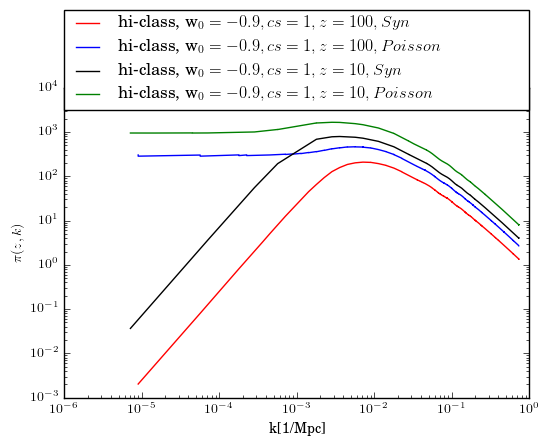

In [249]:
plt.plot((alpha_hi_z1[:,0]),alpha_hi_z1[:,3],color="red",label=r"hi-class, w_0=-0.9,cs=1, z=100, Syn ")
plt.plot((alpha_hi_z1[:,0]),alpha_hi_z1[:,4],color="blue",label=r"hi-class, w_0=-0.9,cs=1, z=100, Poisson ")

plt.plot((alpha_hi_z2[:,0]),alpha_hi_z2[:,3],color="Black",label=r"hi-class, w_0=-0.9,cs=1, z=10, Syn ")
plt.plot((alpha_hi_z2[:,0]),alpha_hi_z2[:,4],color="green",label=r"hi-class, w_0=-0.9,cs=1, z=10, Poisson ")

# plt.plot((alpha_hi_z3[:,0]),alpha_hi_z3[:,2],color="black",label="hi-class, w_0=-0.9,cs=1, z=2" )

plt.legend(bbox_to_anchor=(0., 1.15, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e6,5)
# plt.ylim(0,1e4)
plt.xlabel(r"k[1/Mpc]")
plt.ylabel(r"$\pi(z,k)$ ")
plt.savefig('pi_z.jpg',bbox_inches='tight')
plt.show()

# Comparing the hi-class and class results for                        

# Class= \Omega_L=0 \Omega_fld=0.67  \Omega_scf=0, w0=-0.9, cs=1         

# Hi-class: \Omega_L=0, 'fld'=0.67, w0=-0.9, cs=1, \alpha_k=0.1

# d_total comparison (Class has a bug)- d_tot in hi-class goes wrong after adding output transfer function!

In [24]:
file_hiclass=np.loadtxt("/Users/farbod/Packages/hi_class/output/hi_kess_tk.dat")
file_class=np.loadtxt("/Users/farbod/Packages/class_public/output/class_kess_tk.dat")
lcdm=np.loadtxt("/Users/farbod/Packages/class_public/output/lcdm_tk.dat")
file_hiclass_org=np.loadtxt("/Users/farbod/Packages/hi_class/output/hi_kess_tk_org.dat")

# file_hiclass_2 = file_hiclass[file_hiclass[:,0].argsort()] # sorted in redshift
# file_hiclass=file_hiclass_2[np.logical_and(file_hiclass_2[:,0] < 0.09965908,file_hiclass_2[:,0] > 0.09965908-0.05),:];
# file_hiclass=sort_checkI[np.logical_and(sort_checkI[:,1]> 1./(101.),sort_checkI[:,1]< 1./(1.9)),:]
# sort_check=sort_checkI[sort_checkI[:,1]> 1./(101.),:]

file_hiclass[:,0];

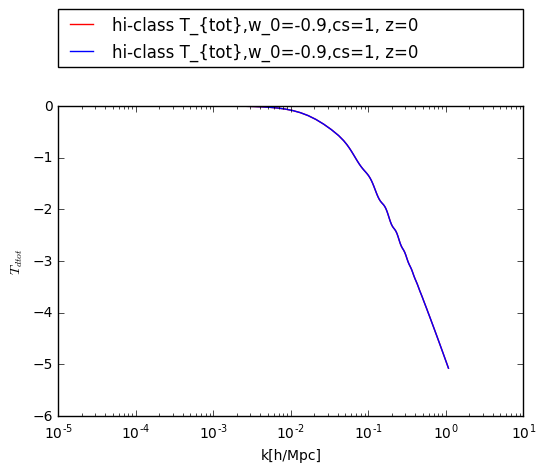

In [26]:
# plt.plot(file_hiclass[:,0],np.abs(file_hiclass[:,6]),color="red",label=r"hi-class T_{tot},w_0=-0.9,cs=1, z=0")
# plt.plot(file_class[:,0],np.abs(file_class[:,6]),color=r"black",label="Class, T_{tot},w_0=-0.9,cs=1, z=0")
# plt.plot(lcdm[:,0],np.abs(lcdm[:,5]),color="Blue",label=r"lcdm, T_{tot}, z=0")
plt.plot(file_hiclass[:,0],(file_hiclass[:,6]),color="red",label=r"hi-class T_{tot},w_0=-0.9,cs=1, z=0")
plt.plot(file_hiclass_org[:,0],(file_hiclass_org[:,6]),color="Blue",label=r"hi-class T_{tot},w_0=-0.9,cs=1, z=0")
# plt.plot(file_class[:,0],(file_class[:,6]),color=r"black",label="Class, T_{tot},w_0=-0.9,cs=1, z=0")
# plt.plot(lcdm[:,0],(lcdm[:,5]),color="Blue",label=r"lcdm, T_{tot}, z=0")


# plt.plot(file_hiclass[:,0],file_hiclass[:,6]/file_class[:,6],color="red",label=r"hi-class T_{tot},w_0=-0.9,cs=1, z=0")

plt.legend(bbox_to_anchor=(0., 1.21, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
plt.xscale('log')
# plt.yscale('log')

plt.xlabel("k[h/Mpc]")
plt.ylabel("$T_{dtot}$")
plt.savefig('Bug_class_hiclass.jpg',bbox_inches='tight')
plt.show()

# hi-class d_tot gets very small  after introducing d_smg in output transfer function! why?!

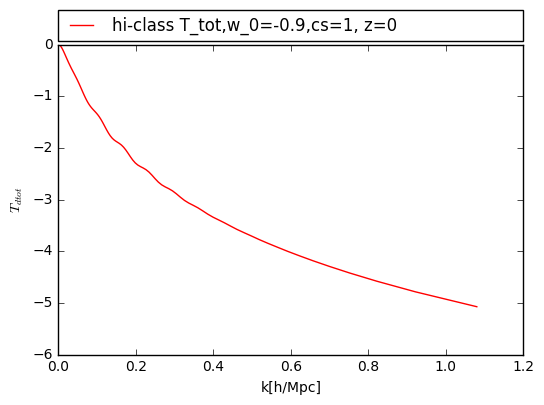

In [45]:
plt.plot(file_hiclass[:,0],file_hiclass[:,6],color="red",label="hi-class T_tot,w_0=-0.9,cs=1, z=0")
# plt.plot(file_class[:,0],file_class[:,6],color="black",label="Class, T_tot,w_0=-0.9,cs=1, z=0")
# plt.plot(lcdm[:,0],lcdm[:,5],color="Blue",label="lcdm, T_tot, z=0")
plt.legend(bbox_to_anchor=(0., 1.01, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
# plt.xscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel("$T_{dtot}$")
plt.savefig('Kessence-dtot_hi.jpg',bbox_inches='tight')
plt.show()

# How about the field "fld" and "smg" transfer functions?!

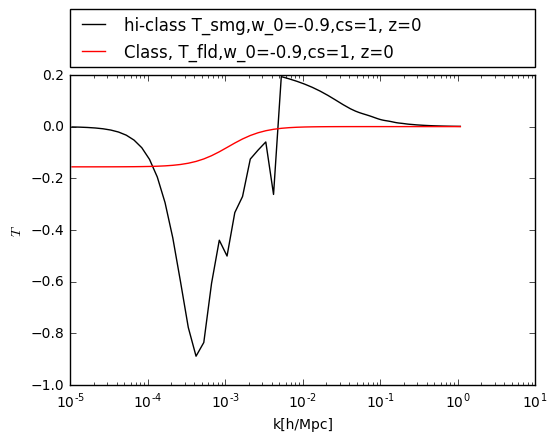

In [44]:
plt.plot(file_hiclass[:,0],file_hiclass[:,4],color="black",label="hi-class T_smg,w_0=-0.9,cs=1, z=0")
plt.plot(file_class[:,0],file_class[:,4],color="red",label="Class, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(Transfer_kess[:,0],Transfer_kess[:,2],color="Blue",label="hi-class, direct smg, z=0")
plt.legend(bbox_to_anchor=(0., 1.11, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel("$T$")
# plt.ylim(-1.,0.22)
plt.savefig('Kessence-smgfld_comp.jpg',bbox_inches='tight')
plt.show()

In [27]:
Kessence_fieldII=np.loadtxt("./../output/Kessence_fieldsII.dat") #This file contains z=0 information

In [37]:
pi_hi_z100=Kessence_field[np.logical_and(Kessence_field[:,1] < 0.00990099+1.E-4,Kessence_field[:,1] > 0.00990099-1.E-4),:];
pi_hi_z10=Kessence_field[np.logical_and(Kessence_field[:,1] < 1./(11.)+1.E-4,Kessence_field[:,1] > 1./(11.)-1.E-4),:];
pi_hi_z0=Kessence_fieldII[np.logical_and(Kessence_fieldII[:,1] < 1./(1.)+1.E-4,Kessence_fieldII[:,1] > 1./(1.)-1.E-4),:];


In [38]:
np.shape(pi_hi_z0)

(482, 4)

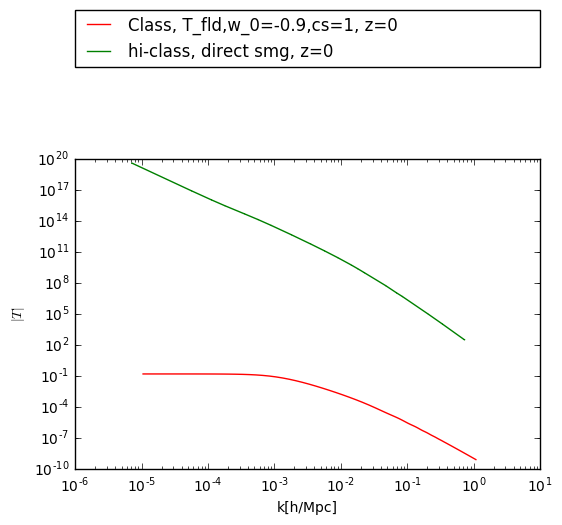

In [50]:
# plt.plot(file_hiclass[:,0],np.fabs(file_hiclass[:,4]),color="black",label="hi-class T_smg,w_0=-0.9,cs=1, z=0")
plt.plot(file_class[:,0],np.fabs(file_class[:,4]),color="red",label="Class, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(pi_hi_z100[:,0],np.fabs(pi_hi_z100[:,2]),color="Blue",label="hi-class, direct smg, z=100")
# plt.plot(pi_hi_z10[:,0],np.fabs(pi_hi_z10[:,2]),color="Magenta",label="hi-class, direct smg, z=10")
plt.plot(pi_hi_z0[:,0],2*3.1415*np.fabs(pi_hi_z0[:,2])/(pi_hi_z0[:,0]**3),color="green",label="hi-class, direct smg, z=0")

plt.legend(bbox_to_anchor=(0., 1.38, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel("$|T|$")
plt.xscale("log")
plt.yscale("log")
# plt.ylim(1e-7,1e4)
# plt.ylim(-1.,0.22)
plt.savefig('Kessence-d_fld.jpg',bbox_inches='tight')
plt.show()

# Comparing d_cdm in class and hi-class

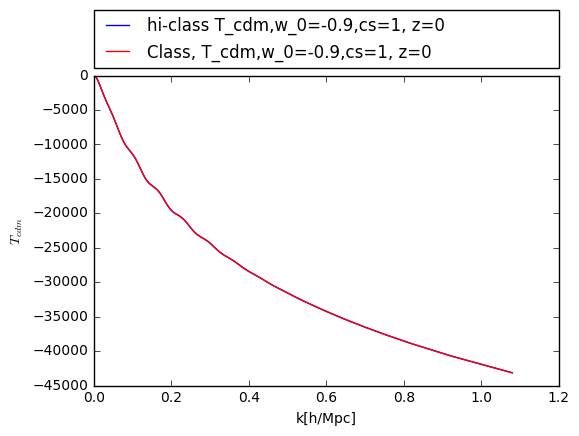

In [127]:
plt.plot(file_hiclass[:,0],file_hiclass[:,3],color="blue",label="hi-class T_cdm,w_0=-0.9,cs=1, z=0")
plt.plot(file_class[:,0],file_class[:,3],color="red",label="Class, T_cdm,w_0=-0.9,cs=1, z=0")
# plt.plot(lcdm[:,0],lcdm[:,5],color="Blue",label="lcdm, T_tot, z=0")
plt.legend(bbox_to_anchor=(0., 1.11, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
# plt.xscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel("$T_{cdm}$")
# plt.ylim(-0.2,0.22)
# plt.savefig('Kessence-dtot_comp.jpg',bbox_inches='tight')
plt.show()

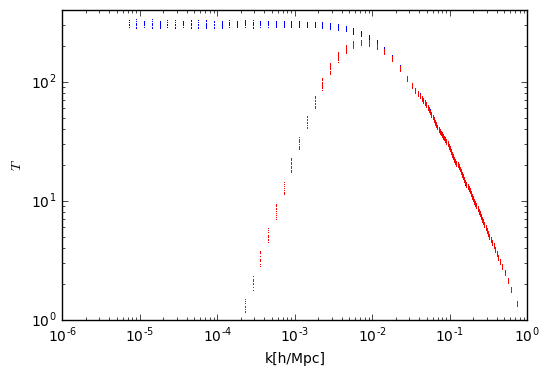

In [134]:
plt.plot(file_hiclass[:,0],file_hiclass[:,1],',',color="blue",label="hi-class T_smg,w_0=-0.9,cs=1, z=0")
plt.plot(file_hiclass[:,0],file_hiclass[:,2],',',color="red",label="hi-class T_smg,w_0=-0.9,cs=1, z=0")
# plt.plot(file_class[:,0],file_class[:,4],color="red",label="Class, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(lcdm[:,0],lcdm[:,5],color="Blue",label="lcdm, T_tot, z=0")
# plt.legend(bbox_to_anchor=(0., 1.11, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel("$T$")
plt.ylim(1,400)
# plt.savefig('Kessence-dtot_comp.jpg',bbox_inches='tight')
plt.show()

# We take a wavenumber k and see h'' for that k in time

# Here we try to check the approximations for gauge transformation

In [32]:
# check_appr = np.loadtxt("./../output/Kessence_check_Approx.dat")
# sort_checkII = check_appr[check_appr[:,1].argsort()] # sorted in redshift
# sort_checkI=sort_checkII[sort_checkII[:,0] == 0.09965908,:];
# # sort_check=sort_checkI[np.logical_and(sort_checkI[:,1]> 1./(101.),sort_checkI[:,1]< 1./(1.9)),:]
# sort_check=sort_checkI[sort_checkI[:,1]> 1./(101.),:]

# Conformal Hubble factor and its derivatives plots

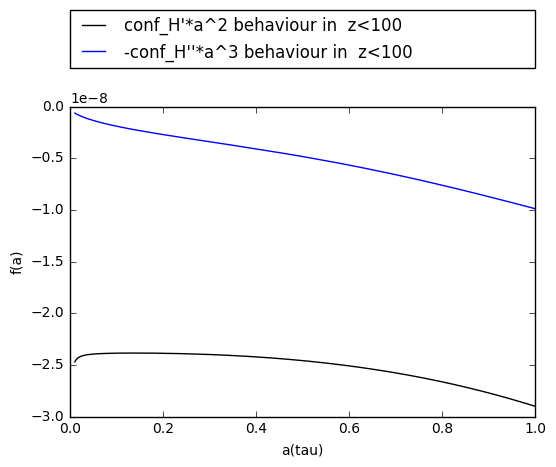

In [126]:
# plt.plot(sort_check[:,1],sort_check[:,2],color="red",label="conf_H behaviour in z<100")
plt.plot(sort_check[:,1],sort_check[:,2]*sort_check[:,1]**2,color="black",label="conf_H'*a^2 behaviour in  z<100")
plt.plot(sort_check[:,1],-1000*sort_check[:,3]*sort_check[:,1]**3,color="blue",label="-conf_H''*a^3 behaviour in  z<100")
# plt.log('x')
plt.legend(bbox_to_anchor=(0., 1.21, 1., .102), loc=1,ncol=1, mode="expand", borderaxespad=0.)
# plt.xlim(1./101.,1/10.)
# plt.ylim(0.0003,0.00040)
plt.xlabel('a(tau)')
plt.ylabel("f(a)")
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.00020,0.00040)
plt.show()

# h'' behaviour in redshifts 10<z<100

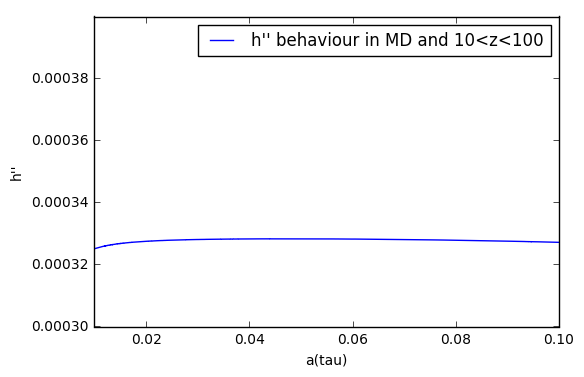

In [114]:
plt.plot(sort_check[:,1],sort_check[:,4],label="h'' behaviour in MD and 10<z<100")
# plt.log('x')
plt.legend()
plt.xlim(1./101.,1/10.)
plt.ylim(0.0003,0.00040)
plt.xlabel('a(tau)')
plt.ylabel("h''")
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.00020,0.00040)
plt.show()

# h'' behaviour in redshifts 5<z<10

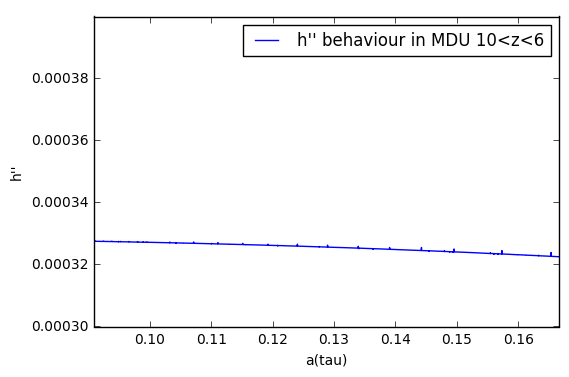

In [89]:
plt.plot(sort_check[:,1],sort_check[:,2],label="h'' behaviour in MDU 10<z<6")
# plt.log('x')
plt.legend()
plt.xlim(1./11.,1./6.)
plt.ylim(0.0003,0.00040)
plt.xlabel('a(tau)')
plt.ylabel("h''")
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.00020,0.00040)
plt.show()

# h'' behaviour in redshifts 0<z<5

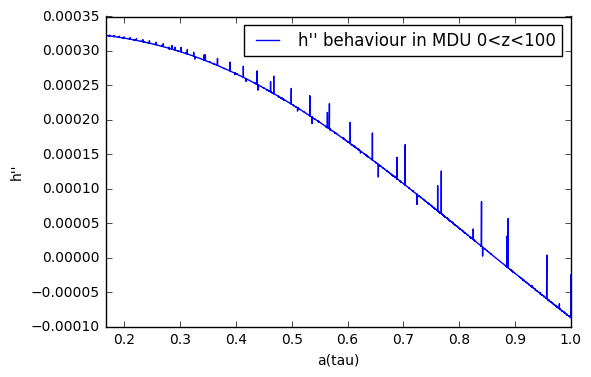

In [90]:
plt.plot(sort_check[:,1],sort_check[:,2],label="h'' behaviour in MDU 0<z<100")
# plt.log('x')
plt.legend()
plt.xlim(1./6.,1.)
#plt.ylim(0.0003,0.00040)
plt.xlabel('a(tau)')
plt.ylabel("h''")
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.00020,0.00040)
plt.show()